# Логистическая регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Почему предыдущие модели не помогают? 

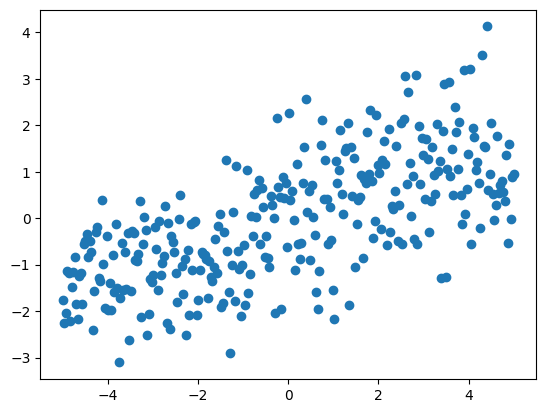

In [2]:
x = np.linspace(-5,5,300)
u = np.random.normal(size=300)
y = 0.3*x + u

plt.scatter(x,y);

$$
y_i = \beta x_i
$$

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(x.reshape(-1, 1), y)
model.coef_

array([0.3087674])

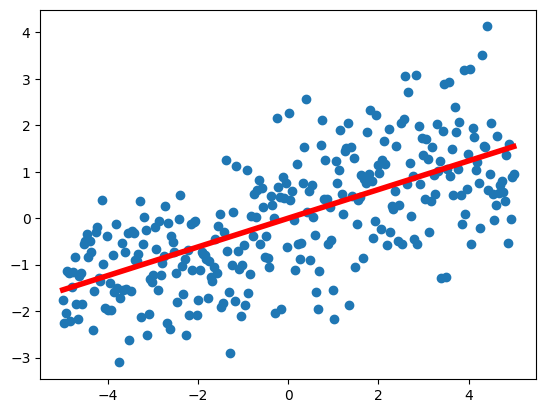

In [4]:
xs = np.linspace(-5,5,100)

plt.plot(xs, model.coef_[0]*xs, color='red', lw=4)
plt.scatter(x,y);

- __Регрессия:__ мы пытаемся объяснить с помощью нашей модели действительное число

- __Классификация:__ мы пытаемся объяснить с помощью нашей модеди какую-то категорию (мы будем рассматривать ситуацию с двумя классами) 

In [5]:
y = (x > 0)

In [6]:
model = LinearRegression(fit_intercept=False)
model.fit(x.reshape(-1, 1), y)
model.coef_

array([0.14950166])

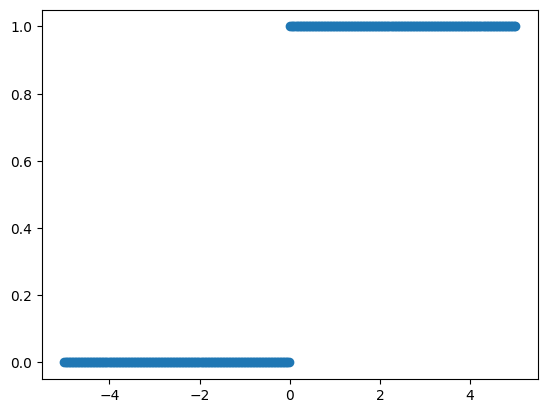

In [7]:
plt.scatter(x,y);

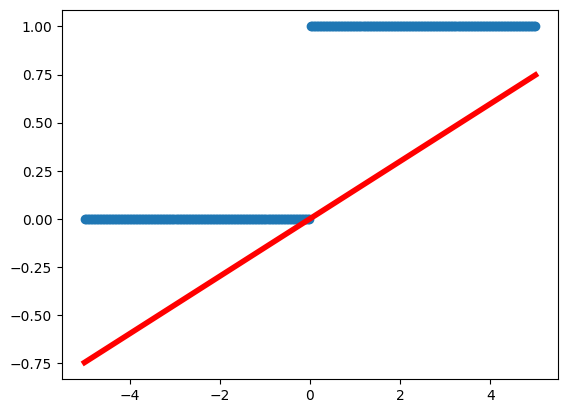

In [8]:
xs = np.linspace(-5,5,100)

plt.plot(xs, model.coef_[0]*xs, color='red', lw=4)
plt.scatter(x,y);

- Логистическое распределение: логистическая регрессия (логит-модель)
- Нормальное распределение: пробит-модель

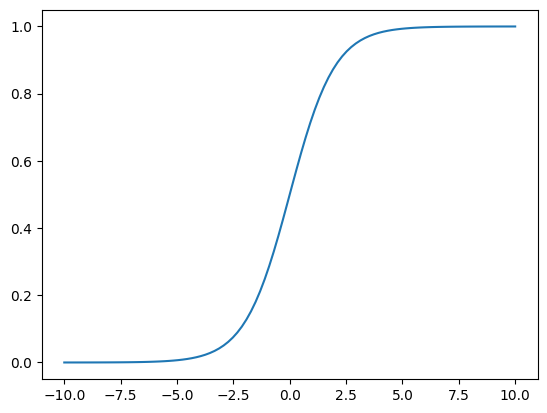

In [9]:
t = np.linspace(-10, 10, 100)
z = np.exp(t)/(1 + np.exp(t))
plt.plot(t, z);

### Как именно выглядит новая модель?

\begin{equation*}
\begin{aligned}
& y^* = \beta \cdot x \\
& P(y = 1)  = \frac{e^{y^*}}{1 + e^{y^*}}
\end{aligned}
\end{equation*}

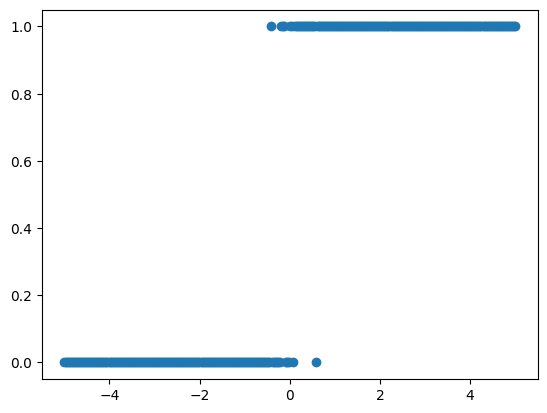

In [10]:
x = np.linspace(-5,5,300)
u = np.random.normal(scale=0.1,size=300)
y = 0.3*x + u
y = 1*(y > 0)
plt.scatter(x,y);

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e+10)
model.fit(x.reshape(-1, 1),y)
model.coef_

array([[5.78395382]])

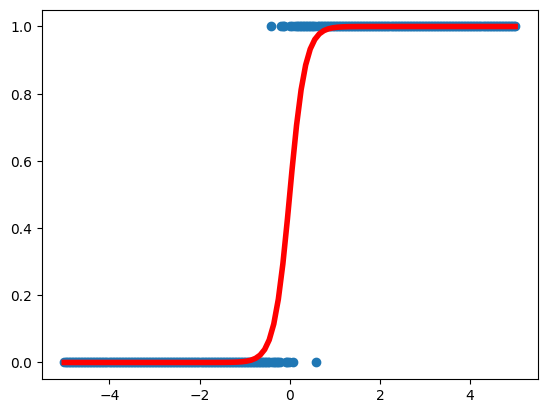

In [12]:
xs = np.linspace(-5,5,100)

sigm = lambda t: np.exp(t)/(1 + np.exp(t))

plt.plot(xs, sigm(model.coef_[0][0]*xs), color='red', lw=4)
plt.scatter(x,y);

In [13]:
x_new = np.array([-10,1,2,3,4])
x_new = x_new[:,None]
x_new

array([[-10],
       [  1],
       [  2],
       [  3],
       [  4]])

In [14]:
model.predict(x_new)

array([0, 1, 1, 1, 1])

In [15]:
model.predict_proba(x_new)

array([[1.00000000e+00, 1.11848540e-25],
       [2.08512288e-03, 9.97914877e-01],
       [6.42829997e-06, 9.99993572e-01],
       [1.97769670e-08, 9.99999980e-01],
       [6.08444406e-11, 1.00000000e+00]])

In [16]:
p = model.predict_proba(x_new)
p.sum(axis=1)

array([1., 1., 1., 1., 1.])

### Как можно прогнозировать?

__Модель:__

\begin{equation*}
\begin{aligned}
& y^* = 0.5 \cdot x \\
& P(y = 1)  = \frac{e^{y^*}}{1 + e^{y^*}}
\end{aligned}
\end{equation*}

Пусть у меня есть $x = 4$, построить прогноз по модели руками:


$$
y^* = 0.5 \cdot 4 = 2
$$

$$
P(y = 1) = \frac{e^{2}}{1 + e^{2}} = 0.88
$$

Нашли вероятность, а прогноз то какой? Единица или ноль? 

In [17]:
np.exp(2)/(1 + np.exp(2))

0.8807970779778824

__Подход первый:__ давайте объявлять единицами всё, что  $\ge 0.5$! 

А почему бы не взять $0.6$? 

Обычно порог подбирают отталкиваясь от здравого смысла и смысла той задачи, которую мы решаем. 

### А как эту модель оценить?

__Когда оценивали линейную регрессию:__ 

$$
MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2 = \frac{1}{n}\sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i + \beta_2 z_i))^2   \to \min_{\beta} 
$$

$$
MAE = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y}_i| = \frac{1}{n}\sum_{i=1}^n |y_i - (\beta_0 + \beta_1 x_i + \beta_2 z_i)|   \to \min_{\beta} 
$$

А можно ли так для классификации? Да, можно. Но непонятно насколько сильно мы ошибаемся, из-за того что y это либо 0 либо 1 и штраф всегда либо 0 либо 1.

$p = P(y = 1)$ 

$y \cdot p + (1 - y) \cdot (1-p) \to \max$ 

$-[y \cdot p + (1 - y) \cdot (1-p)] \to \min$ 

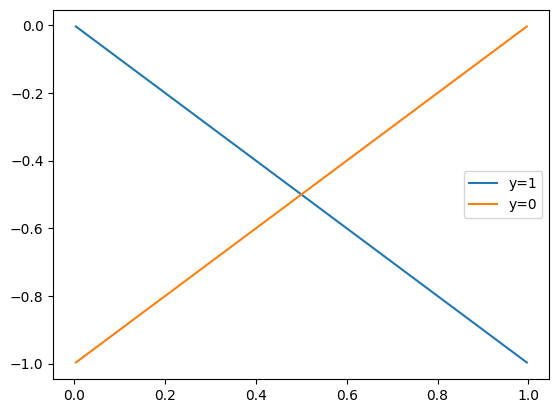

In [18]:
p = np.linspace(0,1,300)[1:-1]
plt.plot(p, -p, label='y=1')
plt.plot(p, -(1-p), label='y=0')
plt.legend();

$-[y \cdot \ln p + (1 - y) \cdot \ln (1-p)] \to \min$ 

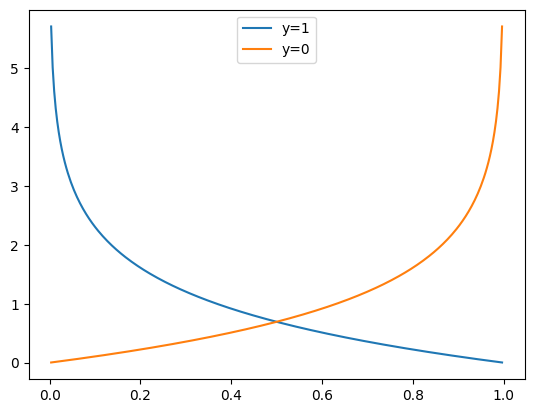

In [19]:
p = np.linspace(0,1,300)[1:-1]
plt.plot(p, -np.log(p), label='y=1')
plt.plot(p, -np.log(1-p), label='y=0')
plt.legend();

# Метрики классификации

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('data/pokemon.csv')
print(df.shape)
df.head()

(801, 41)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [22]:
predictors = ['attack', 'defense', 'speed']
X = df[predictors].values
y = df['is_legendary'].values

In [23]:
X

array([[ 49,  49,  45],
       [ 62,  63,  60],
       [100, 123,  80],
       ...,
       [101,  53,  43],
       [107, 101,  79],
       [ 95, 115,  65]])

In [24]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
y.mean()

0.08739076154806492

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2)

In [27]:
y_train.mean(), y_test.mean()

(0.0875, 0.08695652173913043)

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=10**6)
model.fit(X_train, y_train)
model.coef_

array([[0.01009434, 0.0360709 , 0.04249124]])

In [29]:
p_hat = model.predict_proba(X_test)[:,-1]  
p_hat[:20] # P(y = 1)

array([3.96349840e-01, 2.56398023e-02, 1.63680583e-02, 1.43791455e-01,
       8.27750473e-02, 1.50662531e-01, 5.08397676e-03, 2.21823653e-02,
       6.76412288e-03, 2.37507987e-02, 7.07003363e-03, 6.36330677e-02,
       3.08350567e-03, 2.48506675e-02, 3.23965306e-02, 1.73864478e-02,
       3.61693531e-04, 3.33957892e-01, 1.72947254e-02, 5.59483148e-03])

In [30]:
y_hat = model.predict(X_test)
y_hat[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 1. Доля правильных ответов, accuracy

In [31]:
np.mean(y_hat == y_test)

0.906832298136646

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.906832298136646

In [33]:
y_zero_hat = np.zeros_like(y_test)
y_zero_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [34]:
accuracy_score(y_test, y_zero_hat)

0.9130434782608695

## 2. Матрица ошибок, полнота и точность

In [35]:
tr = 0.1
p_hat = model.predict_proba(X_test)[:,-1]  
y_hat = 1*(p_hat > tr)
y_hat

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0])

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_hat, y_test)

array([[120,   2],
       [ 27,  12]])

<div>
<img src="images/confusion_matrix.png">
</div>

### Precision
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

### Recall
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

### F1 Score
$$
\text{F1 Score} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$



In [37]:
from sklearn.metrics import recall_score, precision_score
print( recall_score(y_test, y_hat) )
print( precision_score(y_test, y_hat) )

0.8571428571428571
0.3076923076923077


## 3. Precision-Recall curve

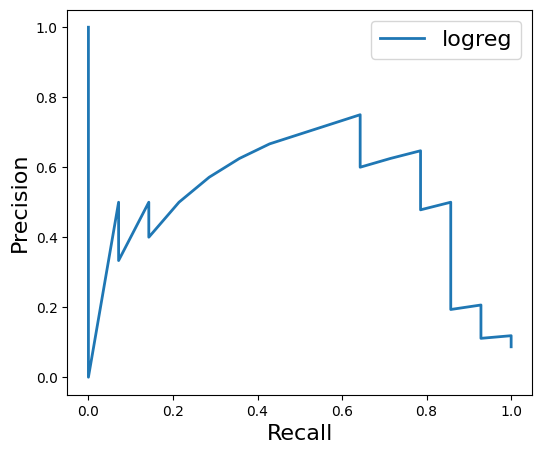

In [38]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(6,5))

pr, rc, tres = precision_recall_curve(y_test, p_hat)
plt.plot(rc, pr, lw=2, label='logreg')

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend(fontsize=16);

Как принять решение? 

- Можно сказать, что мы хотим максимальную точность при ограничениях на полноту

$$
\max_{tr} (precision \mid recall > 0.4)
$$

In [39]:
ind = np.where(pr == pr[rc >= 0.4].max())
pr[ind][0], rc[ind][0], tres[ind][0]

(0.75, 0.6428571428571429, 0.2771955471905566)

In [40]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat)

0.45283018867924535

Все метрики, которые мы посмотрели, зависят от значения порога, а хочется, чтобы не зависили и мы не зацикливались на выборе порога, ну то есть мы хотим сначала обучить модель и понять какая из них самая классная, а уже вторым шагом хотим выбирать порог для принятия решения.

=> pr-auc (площадь под pr-кривой)

In [41]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_hat)

0.27615862398471097

## 4. Roc-auc curve

In [42]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, p_hat)

0.901846452866861

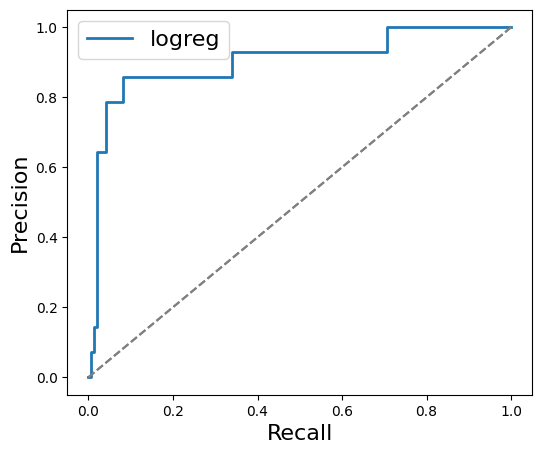

In [43]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(6,5))

fpr, tpr, tres = roc_curve(y_test, p_hat)
plt.plot(fpr, tpr, lw=2, label='logreg')

plt.plot([[0,0], [1,1]], linestyle='dashed', color='grey')

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend(fontsize=16);